<a href="https://www.kaggle.com/code/keenoglanville/a-fool-s-complete-guide-to-logistic-regression?scriptVersionId=110226954" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# What is Logistic Regression

Logistic regression is a Supervised Learning Classification Algorithm. It is used to predict a binary outcome based on a set of independent variables.

A binary outcome is one where there are only two possible scenarios:
* Positive: the event happens (1)
* Negative: the event does not happen (0). 

Independent variables are those variables or factors which may influence the outcome (or dependent variable).


## Example: Predicting if a tumor is benign or malignant
![](https://i.postimg.cc/YqYmq1S5/tumn.jpg)
### In the above example you can see that the markers at the level of y = 1 (yes) demonstrate examples of a malignant tumor while the examples labeled at y = 0(no) demonstrate benign tumors. Logistic Regression aims to classify an input tumor marker from the user as either 1 (malignan) or 0 (benign)


# What is Linear Regression?

Linear Regression is a Supervised Learning Regression Algorithm that takes an input x and outputs a prediction y utilizing a trendline within a set of Data Points.

* Supervised learning Algorithm learns through being given a dataset which represents accurate data or "the right answers".


![](https://qph.fs.quoracdn.net/main-qimg-37d126042d314752b8642f742d0bc109)










# The difference between Linear and Logistic Regression
![](https://www.machinelearningplus.com/wp-content/uploads/2017/09/linear_vs_logistic_regression.jpg)



# The Similarities with Linear Regression and Logistic Regression 

While Logistic Regression is a classification system, it shares many similarities with that of the Linear Regression Model

* Line of Best Fit/Trendline/Regression Line/ Cost Function
* Equation for Cost Function
* Implimentation of Gradient Descent

# Line of Best fit
## To Understand the Logistic Regression, One must first understand Linear Regression and its parameters
​
When conducting our linear regression there is room for error. That error falls within our line of best fit.
​
The line of best fit has a target x1 and y1. This means that for every x value there is a y value that corresponds, however where the value of x1 meets the trendline is where the prediction is executed.
​
![](https://i.postimg.cc/50XBNQQT/error.png)
​
​
![](https://i.postimg.cc/hvS7QJXK/cost.png)
​
​
​
# Tuning Line of Best fit
​
The importance of the Cost Function is to find the parameters for the equation of our line of best fit. With these new parameters we would reduce our total squared error (Cost) significantly and thus have more accurate predictions. 
​
![](https://i.postimg.cc/zGt3XzZR/descent.png)
​
# Gradient Descent Algorithm
![](https://i.postimg.cc/gjzPZh3c/algo.png)



## The above Gradient Descent Algoritm is to be run simultaneously to ensure that the Cost Function is updating with new unique parameters. This is important because any deviation will be detrimental to the Cost Function. 



# Cost Function : Linear Regression vs Logistic Regression
![](https://i.postimg.cc/wjgsG7kD/main-qimg-d551e49dd975703f260152e111883af9-lq.jpg)

# The f(x) function is the major difference between calculating the cost function of the Linear Regression Model vs Logistic Regression Model
In the above function:
  * Linear Regression Function : y
  * Logistic Regression Function: p
  
The Logistic Regression model calculates the sigmoid curve of the Linear Regression function





​

# Credit Card Fault Prediction with Logistic Regression

We will be conducting a Logistic Regression model utilizing the sklearn library. We will also run the models of Support Vector Machine and MLPClassifier to compare. The primary focus will be Logistic Regression, with a manual example of gradient descent below that. 

# Import Libraries and Data




In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc


In [2]:
data = pd.read_csv('../input/default-of-credit-card-clients-dataset/UCI_Credit_Card.csv')
data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [3]:
data.info()
# There are no Object collumns or NA colums thus we can move on to Cleansing the Data
#It also helps that these values are all numerical as we can issue a correlation heatmap

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

# Visualization
A large part of Regression Models has to do with correlations. Correlations help the algorithms to detect waht features influence each other or the desired outcomes. Heatmaps are a very impactful way to visualize these correlations

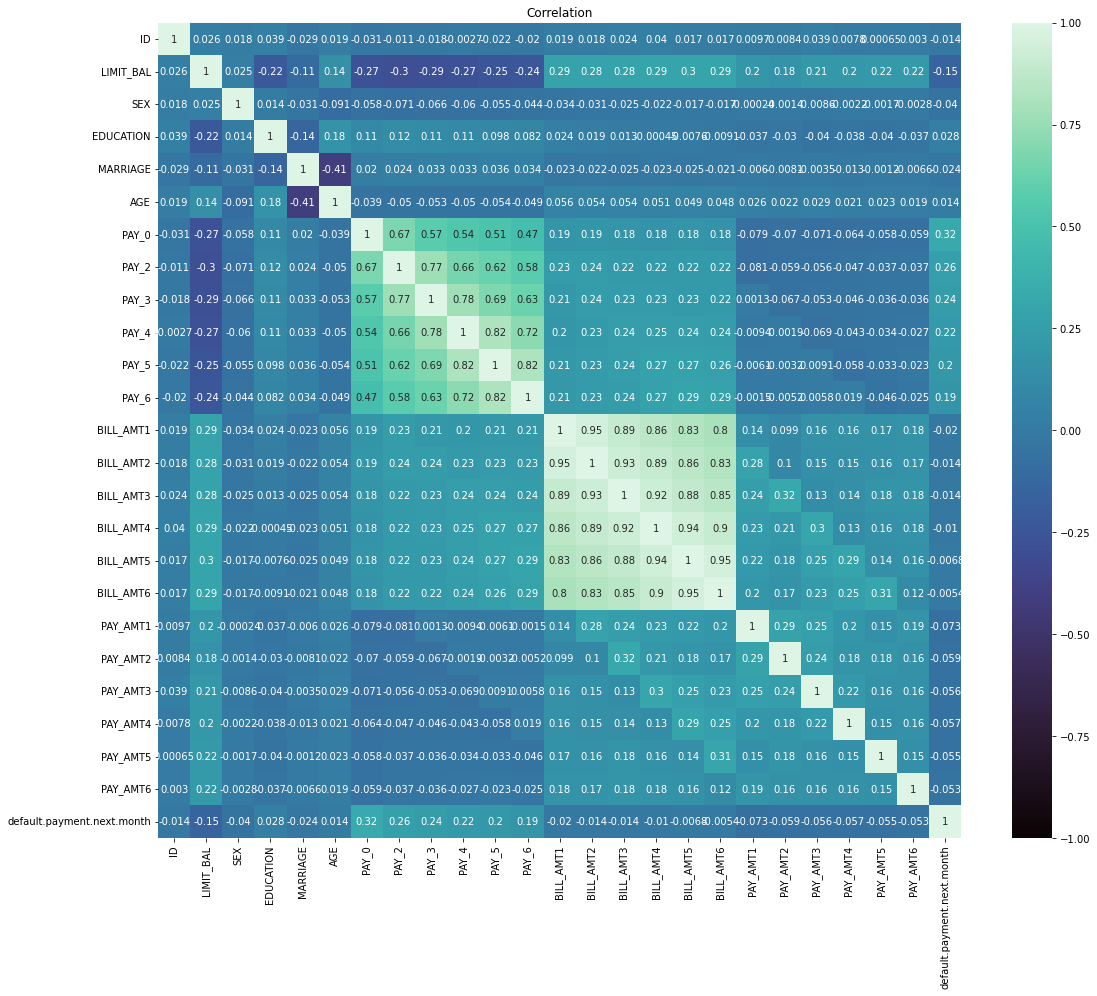

In [4]:
#Find the correlation of the dataset

corr= data.corr()

#Plot heatmap
plt.figure(figsize=(18,15))
sns.heatmap(corr, annot=True, vmin=-1.0, cmap ='mako')
plt.title('Correlation')
plt.show()

# Cleanse Data

An important factor to our regression model is the type of our features.

A feature could be: 
* Nominal:

Has no difference in  magnitude dictated by the columns, ex:sex, marriage. We dont want our algorithm to think that there is an ordered difference of sex or education. This means if 1 denotes male and 2 denotes female we dont want our model to think of this as an actual numerical difference. Thus we would choose to separate the features
* Ordinal:

Used to demonstrate the order or rank of elements in a collection
    
Therefore, Nominal = identity, Ordinal =  magnitude

# One hot encoding
One hot encoding is one method of converting data to prepare it for an algorithm and get a better prediction. With one-hot, we convert each categorical value into a new categorical column and assign a binary value of 1 or 0 to those columns. Each integer value is represented as a binary vector.
    

In [5]:
#Setup dummies to split nominal features into separate columns
def onehotencode(df, columndict):
    df= df.copy()
    
    for column, prefix in columndict.items():
        dummies= pd.get_dummies(df[column], prefix = prefix)
        #concat to original dataframe 
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
        
    return df

In [6]:
# Cleanse Data

def cleaner(df):
    df = df.copy()
    
    #We do not need the ID column index
    df=df.drop('ID', axis=1)
    
    df=onehotencode(
        df,
        {
            'EDUCATION': 'EDU',
            'MARRIAGE': 'MAR'
        }
    )
    
    #Turn Data Set into X and y sets
    #Use the copy function so we can keep our original data frames at all times
    y = df['default.payment.next.month'].copy()
    X = df.drop('default.payment.next.month', axis=1).copy()
    
    
    #Scale our Data 
    scaler = StandardScaler()
    X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
    
    
    
    return X, y

In [7]:
X,y =  cleaner(data)

In [8]:
X

,LIMIT_BAL,SEX,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,EDU_1,EDU_2,EDU_3,EDU_4,EDU_5,EDU_6,MAR_0,MAR_1,MAR_2,MAR_3
0,-1.136720,0.810161,-1.246020,1.794564,1.782348,-0.696663,-0.666599,-1.530046,-1.486041,-0.642501,...,-0.738375,1.066900,-0.442752,-0.064163,-0.097063,-0.041266,-0.042465,1.093780,-1.066471,-0.104326
1,-0.365981,0.810161,-1.029047,-0.874991,1.782348,0.138865,0.188746,0.234917,1.992316,-0.659219,...,-0.738375,1.066900,-0.442752,-0.064163,-0.097063,-0.041266,-0.042465,-0.914261,0.937672,-0.104326
2,-0.597202,0.810161,-0.161156,0.014861,0.111736,0.138865,0.188746,0.234917,0.253137,-0.298560,...,-0.738375,1.066900,-0.442752,-0.064163,-0.097063,-0.041266,-0.042465,-0.914261,0.937672,-0.104326
3,-0.905498,0.810161,0.164303,0.014861,0.111736,0.138865,0.188746,0.234917,0.253137,-0.057491,...,-0.738375,1.066900,-0.442752,-0.064163,-0.097063,-0.041266,-0.042465,1.093780,-1.066471,-0.104326
4,-0.905498,-1.234323,2.334029,-0.874991,0.111736,-0.696663,0.188746,0.234917,0.253137,-0.578618,...,-0.738375,1.066900,-0.442752,-0.064163,-0.097063,-0.041266,-0.042465,1.093780,-1.066471,-0.104326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.404759,-1.234323,0.381275,0.014861,0.111736,0.138865,0.188746,0.234917,0.253137,1.870379,...,-0.738375,-0.937295,2.258602,-0.064163,-0.097063,-0.041266,-0.042465,1.093780,-1.066471,-0.104326
29996,-0.134759,-1.234323,0.815221,-0.874991,-0.723570,-0.696663,-0.666599,0.234917,0.253137,-0.672786,...,-0.738375,-0.937295,2.258602,-0.064163,-0.097063,-0.041266,-0.042465,-0.914261,0.937672,-0.104326
29997,-1.059646,-1.234323,0.164303,3.574267,2.617654,1.809921,-0.666599,0.234917,0.253137,-0.647227,...,-0.738375,1.066900,-0.442752,-0.064163,-0.097063,-0.041266,-0.042465,-0.914261,0.937672,-0.104326
29998,-0.674276,-1.234323,0.598248,0.904712,-0.723570,0.138865,0.188746,0.234917,-0.616452,-0.717982,...,-0.738375,-0.937295,2.258602,-0.064163,-0.097063,-0.041266,-0.042465,1.093780,-1.066471,-0.104326


# Train the Models
You want to train your models against others to see their performance and what models could be done better

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=1234) #Set state to be apple to reproduce values automatically

In [10]:
models = {
    LogisticRegression(): "Logistic Regression",
    SVC():                "Support Vector Machine",
    MLPClassifier():      "Neural Network"
}

for model in models.keys():
    model.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [11]:
for model, name in models.items():
    print(name+ ": {:.2f}%".format(model.score(X_test, y_test)*100))

Logistic Regression: 81.14%
Support Vector Machine: 82.12%
Neural Network: 80.81%


As seen above Support Vector Machine was the most accurate in predicting the defaults on credit card clients. However as this is a Logistic Regression Model we will now go into the actual evaluation of this dataset.

# ROC and AUC
The Receiver Operating Characteristics(ROC) is a measure of a classification model's performance over various thresholds. This is accomplished using the parameters of a Confusion Matrix.
The Area Under the Curve is a metric to evaulate the ROC of various classification models.

## ROC measures model's accuracy
## AUC measures model's accuracy vs other models

# Confusion Matrix
![](https://ekababisong.org/assets/ieee_ompi/confusion_matrix.png)

# Compare SVM and Logistic regression for ROC and AUC

In [12]:

model_SVC = SVC(kernel = 'rbf', random_state = 1234)
model_SVC.fit(X_train, y_train)
y_pred_svm = model_SVC.decision_function(X_test)


model_logistic = LogisticRegression()
model_logistic.fit(X_train, y_train)
y_pred_logistic = model_logistic.decision_function(X_test)





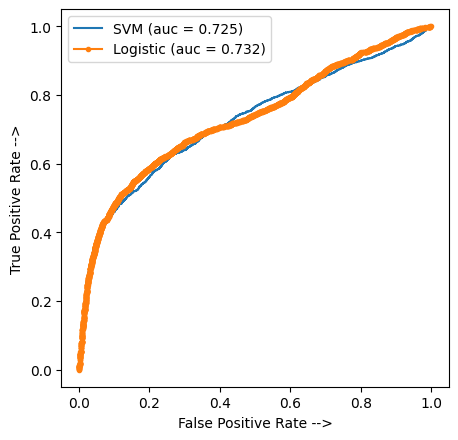

In [13]:
#Plot ROC and compare AUC
logistic_fpr, logistic_tpr, threshold = roc_curve(y_test, y_pred_logistic)
auc_logistic = auc(logistic_fpr, logistic_tpr)

svm_fpr, svm_tpr, threshold = roc_curve(y_test, y_pred_svm)
auc_svm = auc(svm_fpr, svm_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(svm_fpr, svm_tpr, linestyle='-', label='SVM (auc = %0.3f)' % auc_svm)
plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic (auc = %0.3f)' % auc_logistic)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

Above we see that in this score the Logistic Regression has the larger AUC and could be seen as a stronger model regarding this metric.

# Conclusion
The Logistic Regression is an amazing tool that aids in the creation of classification. There are various means casses for utilization for the Logistic Regression model as there are various evaluation metrics to judge model performance.  I hope this tutorial helped.